### PyTorch for Deep Learning
#### Introduction to tensors:
Tensors are the basic building block of all of machine learning and deep learning.
For example, you could represent an image as a tensor with shape [3, 224, 224] which would mean [colour_channels, height, width], as in the image has 3 colour channels (red, green, blue), a height of 224 pixels and a width of 224 pixels.

In [2]:
import torch
torch.__version__


'2.1.2+cpu'

#### Creating tensors
A scalar is a single number and in tensor-speak it's a zero dimension tensor.

In [13]:
# Scalar
scalar = torch.tensor(7)
print(scalar)
# Get the Python number within a tensor (only works with one-element tensors)
print(scalar.item())
print(scalar.ndim)

tensor(7)
7
0


In [12]:
# Vector
vector = torch.tensor([7, 7])
print(vector)
# Check the number of dimensions of vector
print(vector.ndim)
# Check shape of vector
# Shape and dimensions are two different things
print(vector.shape)

tensor([7, 7])
1
torch.Size([2])


In [10]:
# Matrix
# We get the output torch.Size([2, 2]) because MATRIX is two elements deep and two elements wide.
# MATRIX has two dimensions (count the number of square brakcets on the outside of one side).
MATRIX = torch.tensor([[7, 8], 
                       [9, 10]])

print(MATRIX)
print(MATRIX.ndim)
print(MATRIX.shape)

tensor([[ 7,  8],
        [ 9, 10]])
2
torch.Size([2, 2])


In [15]:
# Tensor
TENSOR = torch.tensor([[[1, 2, 3],
                        [3, 6, 9],
                        [2, 4, 5]]])
print(TENSOR)

# Check number of dimensions for TENSOR
print(TENSOR.ndim)

print(TENSOR.shape)

tensor([[[1, 2, 3],
         [3, 6, 9],
         [2, 4, 5]]])
3
torch.Size([1, 3, 3])


using lowercase letters for scalar and vector and uppercase letters for MATRIX and TENSOR. This was on purpose. In practice, you'll often see scalars and vectors denoted as lowercase letters such as y or a. And matrices and tensors denoted as uppercase letters such as X or W.

In [18]:
# Create a random tensor of size (3, 4)
random_tensor = torch.rand(size=(3, 4))
random_tensor, random_tensor.dtype

(tensor([[0.5730, 0.3738, 0.3437, 0.0644],
         [0.4603, 0.0360, 0.1702, 0.8043],
         [0.9954, 0.0441, 0.7254, 0.4677]]),
 torch.float32)

In [19]:
# Create a random tensor of size (224, 224, 3)
random_image_size_tensor = torch.rand(size=(224, 224, 3))
random_image_size_tensor.shape, random_image_size_tensor.ndim

(torch.Size([224, 224, 3]), 3)

In [20]:
# Create a tensor of all zeros
zeros = torch.zeros(size=(3, 4))
zeros, zeros.dtype

(tensor([[0., 0., 0., 0.],
         [0., 0., 0., 0.],
         [0., 0., 0., 0.]]),
 torch.float32)

In [21]:
# Create a tensor of all ones
ones = torch.ones(size=(3, 4))
ones, ones.dtype

(tensor([[1., 1., 1., 1.],
         [1., 1., 1., 1.],
         [1., 1., 1., 1.]]),
 torch.float32)

In [22]:
# Use torch.arange(), torch.range() is deprecated 
# in python we can use range() to create a range of values
zero_to_ten_deprecated = torch.range(0, 10) # Note: this may return an error in the future

# Create a range of values 0 to 10
zero_to_ten = torch.arange(start=0, end=10, step=1)
zero_to_ten

C:\Users\User\AppData\Local\Temp\ipykernel_13924\193451495.py:2: UserWarning: torch.range is deprecated and will be removed in a future release because its behavior is inconsistent with Python's range builtin. Instead, use torch.arange, which produces values in [start, end).
  zero_to_ten_deprecated = torch.range(0, 10) # Note: this may return an error in the future


tensor([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
# Can also create a tensor of zeros similar to another tensor
ten_zeros = torch.zeros_like(input=zero_to_ten) # will have same shape
ten_zeros

##### Precision in computing
Generally if you see torch.cuda anywhere, the tensor is being used for GPU (since Nvidia GPUs use a computing toolkit called CUDA).

The most common type (and generally the DEFAULT) is torch.float32 or torch.float.

This is referred to as "32-bit floating point". 

But there's also 16-bit floating point (torch.float16 or torch.half) and 64-bit floating point (torch.float64 or torch.double).

lower precision datatypes are generally faster but fewer accurate

And to confuse things even more there's also 8-bit, 16-bit, 32-bit and 64-bit integers.

#### Getting information from tensors

In [23]:
# Create a tensor
some_tensor = torch.rand(3, 4)

# Find out details about it
print(some_tensor)
print(f"Shape of tensor: {some_tensor.shape}")
print(f"Datatype of tensor: {some_tensor.dtype}")
print(f"Device tensor is stored on: {some_tensor.device}") # will default to CPU

tensor([[0.7352, 0.5966, 0.8926, 0.7212],
        [0.8733, 0.3189, 0.8136, 0.7570],
        [0.6708, 0.9023, 0.4974, 0.6800]])
Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device tensor is stored on: cpu


#### Manipulating tensors

In [24]:
# Create a tensor of values and add a number to it
tensor = torch.tensor([1, 2, 3])
tensor + 10

tensor([11, 12, 13])

In [32]:
# Multiply it by 10
print(tensor * 10)

# Can also use torch functions
print(torch.multiply(tensor, 10))
# Original tensor is still unchanged 
print(tensor)

tensor([10, 20, 30])
tensor([10, 20, 30])
tensor([1, 2, 3])


In [26]:
# Subtract and reassign
tensor = tensor - 10
tensor

tensor([-9, -8, -7])

In [27]:
# Add and reassign
tensor = tensor + 10
tensor

tensor([1, 2, 3])

Matrix multiplication(ALL YOU NEED!) @
1. The inner dimensions must match
2. The resulting matrix has the shape of the outer dimensions


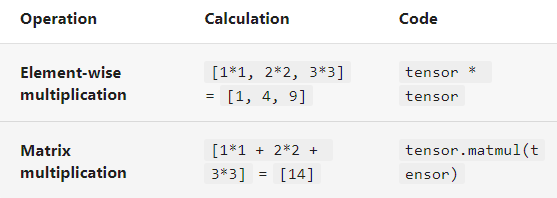

In [34]:
# Element-wise matrix multiplication
print(tensor * tensor)
# Matrix multiplication
print(torch.matmul(tensor, tensor))
print(tensor @ tensor)

tensor([1, 4, 9])
tensor(14)
tensor(14)


The in-built torch.matmul() method is faster.

In [35]:
%%time
# Matrix multiplication by hand 
# (avoid doing operations with for loops at all cost, they are computationally expensive)
value = 0
for i in range(len(tensor)):
  value += tensor[i] * tensor[i]
value

CPU times: total: 0 ns
Wall time: 6.92 ms


tensor(14)

In [36]:
%%time
torch.matmul(tensor, tensor)

CPU times: total: 0 ns
Wall time: 96.1 µs


tensor(14)

Most common errors

In [37]:
# Shapes need to be in the right way  
tensor_A = torch.tensor([[1, 2],
                         [3, 4],
                         [5, 6]], dtype=torch.float32)

tensor_B = torch.tensor([[7, 10],
                         [8, 11], 
                         [9, 12]], dtype=torch.float32)

# Matrix multiplication will doesn't work
torch.matmul(tensor_A, tensor_B)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (3x2 and 3x2)

In [39]:
# One of the ways to do this is with a transpose (switch the dimensions of a given tensor).
print(tensor_A)
print(tensor_B.T)
print(torch.transpose(tensor_B, 0, 1))
print(torch.matmul(tensor_A, tensor_B.T))
# short form of matmul
print(torch.mm(tensor_A , tensor_B.T))

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])
tensor([[ 7.,  8.,  9.],
        [10., 11., 12.]])
tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])
tensor([[ 27.,  30.,  33.],
        [ 61.,  68.,  75.],
        [ 95., 106., 117.]])


The torch.nn.Linear() module also known as a feed-forward layer or fully connected layer, implements a matrix multiplication between an input x and a weights matrix A.

y=x⋅AT+b (y=mx+b)
 
Where:

x is the input to the layer 
A is the weights matrix created by the layer, this starts out as random numbers that get adjusted as a neural network learns to better represent patterns in the data (notice the "T", that's because the weights matrix gets transposed).
Note: You might also often see W or another letter like X used to showcase the weights matrix.
b is the bias term used to slightly offset the weights and inputs.
y is the output (a manipulation of the input in the hopes to discover patterns in it).

In [45]:
# Since the linear layer starts with a random weights matrix, let's make it reproducible (more on this later)
torch.manual_seed(42)
# This uses matrix multiplication
linear = torch.nn.Linear(in_features=2, # in_features = matches inner dimension of input 
                         out_features=6) # out_features = describes outer value 
x = tensor_A
print(x)
output = linear(x)
print(f"Input shape: {x.shape}\n")
print(f"Output:\n{output}\n\nOutput shape: {output.shape}")

tensor([[1., 2.],
        [3., 4.],
        [5., 6.]])
Input shape: torch.Size([3, 2])

Output:
tensor([[2.2368, 1.2292, 0.4714, 0.3864, 0.1309, 0.9838],
        [4.4919, 2.1970, 0.4469, 0.5285, 0.3401, 2.4777],
        [6.7469, 3.1648, 0.4224, 0.6705, 0.5493, 3.9716]],
       grad_fn=<AddmmBackward0>)

Output shape: torch.Size([3, 6])


Lower precision:
The trend of lower precision arithmetic is because Machine Learning isn’t scientific computing, precisions don’t matter too much at least not for all ops.

with torch.cuda.amp.autocast():
output = net(input)

In [ ]:
quantized_model = torch.quantization.quantize_dynamic(
model, {torch.nn.Linear}, dtype=torch.qint8
)

Fusion


In [ ]:
# A typical MLP would look like

# def forward(self, x):
# x = F.relu(self.fc1(x)) # write x
# y = F.relu(self.fc2(x)) # write y
# z = self.fc3(y) # write z
# return z

# or

# def forward(self, x):
# return self.fc3(F.relu(self.fc2(F.relu(self.fc1(x))))

Finding the max,min,agg,sum

In [46]:
# Create a tensor
x = torch.arange(0, 100, 10)
x

tensor([ 0, 10, 20, 30, 40, 50, 60, 70, 80, 90])

In [47]:
print(f"Minimum: {x.min()}")
print(f"Maximum: {x.max()}")
# print(f"Mean: {x.mean()}") # this will error
print(f"Mean: {x.type(torch.float32).mean()}") # won't work without float datatype
print(f"Sum: {x.sum()}")

Minimum: 0
Maximum: 90
Mean: 45.0
Sum: 450


Positional min/max:

You can also find the index of a tensor where the max or minimum occurs with torch.argmax() and torch.argmin() respectively.

In [48]:
# Create a tensor
tensor = torch.arange(10, 100, 10)
print(f"Tensor: {tensor}")

# Returns index of max and min values
print(f"Index where max value occurs: {tensor.argmax()}")
print(f"Index where min value occurs: {tensor.argmin()}")

Tensor: tensor([10, 20, 30, 40, 50, 60, 70, 80, 90])
Index where max value occurs: 8
Index where min value occurs: 0


Change datatype

In [52]:
# Create a tensor and check its datatype
tensor = torch.arange(10., 100., 10.)
print(tensor.dtype)
# Create a float16 tensor
tensor_float16 = tensor.type(torch.float16)
print(tensor_float16)

# Create a int8 tensor
tensor_int8 = tensor.type(torch.int8)
tensor_int8

torch.float32
tensor([10., 20., 30., 40., 50., 60., 70., 80., 90.], dtype=torch.float16)


tensor([10, 20, 30, 40, 50, 60, 70, 80, 90], dtype=torch.int8)

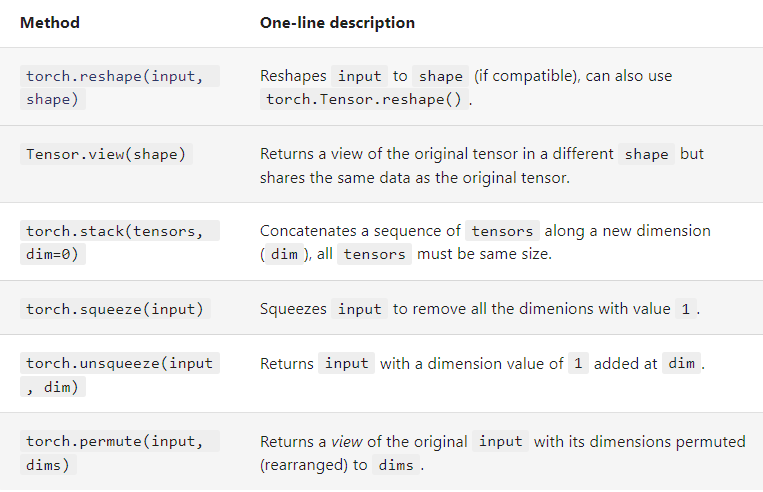

In [56]:
x = torch.arange(1., 8.)
print(x, x.shape)

# Add an extra dimension
x_reshaped = x.reshape(1, 7)
print(x_reshaped, x_reshaped.shape)
# Change view (keeps same data as original but changes view)
# See more: https://stackoverflow.com/a/54507446/7900723
z = x.view(1, 7)
print(z, z.shape)
# changing the view of a tensor with torch.view() really only creates a new view of the same tensor.

# Changing z changes x
z[:, 0] = 5
print(z, x)

tensor([1., 2., 3., 4., 5., 6., 7.]) torch.Size([7])
tensor([[1., 2., 3., 4., 5., 6., 7.]]) torch.Size([1, 7])
tensor([[1., 2., 3., 4., 5., 6., 7.]]) torch.Size([1, 7])
tensor([[5., 2., 3., 4., 5., 6., 7.]]) tensor([5., 2., 3., 4., 5., 6., 7.])


In [57]:
# Stack tensors on top of each other
x_stacked = torch.stack([x, x, x, x], dim=0) # try changing dim to dim=1 and see what happens
x_stacked

tensor([[5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.],
        [5., 2., 3., 4., 5., 6., 7.]])

In [59]:
# remove all single dimensions

print(f"Previous tensor: {x_reshaped}")
print(f"Previous shape: {x_reshaped.shape}")

# Remove extra dimension from x_reshaped
x_squeezed = x_reshaped.squeeze()
print(f"\nNew tensor: {x_squeezed}")
print(f"New shape: {x_squeezed.shape}")

# and unsqueeze adds a dimension

print(f"Previous tensor: {x_squeezed}")
print(f"Previous shape: {x_squeezed.shape}")

## Add an extra dimension with unsqueeze
x_unsqueezed = x_squeezed.unsqueeze(dim=0)
print(f"\nNew tensor: {x_unsqueezed}")
print(f"New shape: {x_unsqueezed.shape}")

Previous tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
Previous shape: torch.Size([1, 7])

New tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
New shape: torch.Size([7])
Previous tensor: tensor([5., 2., 3., 4., 5., 6., 7.])
Previous shape: torch.Size([7])

New tensor: tensor([[5., 2., 3., 4., 5., 6., 7.]])
New shape: torch.Size([1, 7])


In [60]:
# Create tensor with specific shape
x_original = torch.rand(size=(224, 224, 3))

# Permute the original tensor to rearrange the axis order
x_permuted = x_original.permute(2, 0, 1) # shifts axis 0->1, 1->2, 2->0

print(f"Previous shape: {x_original.shape}")
print(f"New shape: {x_permuted.shape}")

Previous shape: torch.Size([224, 224, 3])
New shape: torch.Size([3, 224, 224])


#### Indexing on tensors

In [62]:
x = torch.arange(1, 10).reshape(1, 3, 3)
x, x.shape
# Let's index bracket by bracket
print(f"First square bracket:\n{x[0]}") 
print(f"Second square bracket: {x[0][0]}") 
print(f"Third square bracket: {x[0][0][0]}")

First square bracket:
tensor([[1, 2, 3],
        [4, 5, 6],
        [7, 8, 9]])
Second square bracket: tensor([1, 2, 3])
Third square bracket: 1


In [66]:
# Get all values of 0th dimension and the 0 index of 1st dimension
print(x[:, 0])
# Get all values of 0th & 1st dimensions but only index 1 of 2nd dimension
print(x[:, :, 1])
# Get all values of the 0 dimension but only the 1 index value of the 1st and 2nd dimension
print(x[:, 1, 1])
# Get index 0 of 0th and 1st dimension and all values of 2nd dimension 
print(x[0, 0, :]) # same as x[0][0]

tensor([[1, 2, 3]])
tensor([[2, 5, 8]])
tensor([5])
tensor([1, 2, 3])


#### Mixing PyTorch tensors and NumPy

In [69]:
# NumPy array to tensor
import torch
import numpy as np
array = np.arange(1.0, 8.0)
tensor = torch.from_numpy(array)
print(array, tensor)

# NumPy arrays are created with the datatype float64 
# and if you convert it to a PyTorch tensor, 
# it'll keep the same datatype (as above).
#So if you want to convert 
# your NumPy array (float64) -> PyTorch tensor (float64) -> PyTorch tensor (float32),
tensor = torch.from_numpy(array).type(torch.float32)
print(tensor)

[1. 2. 3. 4. 5. 6. 7.] tensor([1., 2., 3., 4., 5., 6., 7.], dtype=torch.float64)
tensor([1., 2., 3., 4., 5., 6., 7.])


In [70]:
# Change the array, keep the tensor vice-versa
array = array + 1
array, tensor

(array([2., 3., 4., 5., 6., 7., 8.]), tensor([1., 2., 3., 4., 5., 6., 7.]))

In [71]:
# Tensor to NumPy array
tensor = torch.ones(7) # create a tensor of ones with dtype=float32
numpy_tensor = tensor.numpy() # will be dtype=float32 unless changed
tensor, numpy_tensor

(tensor([1., 1., 1., 1., 1., 1., 1.]),
 array([1., 1., 1., 1., 1., 1., 1.], dtype=float32))

#### Reproducibility

In [73]:
import torch

# Create two random tensors
random_tensor_A = torch.rand(3, 4)
random_tensor_B = torch.rand(3, 4)

print(f"Tensor A:\n{random_tensor_A}\n")
print(f"Tensor B:\n{random_tensor_B}\n")
print(f"Does Tensor A equal Tensor B? (anywhere)")
random_tensor_A == random_tensor_B

#But what if you wanted to created two random tensors with the same values??? - random_seed

Tensor A:
tensor([[0.4563, 0.9719, 0.3968, 0.1496],
        [0.4743, 0.9973, 0.4436, 0.9726],
        [0.5194, 0.5337, 0.7050, 0.3362]])

Tensor B:
tensor([[0.7891, 0.1694, 0.1800, 0.7177],
        [0.6988, 0.5510, 0.2485, 0.8518],
        [0.0963, 0.1338, 0.2741, 0.6142]])

Does Tensor A equal Tensor B? (anywhere)


tensor([[False, False, False, False],
        [False, False, False, False],
        [False, False, False, False]])

In [77]:
import torch
import random

# # Set the random seed
RANDOM_SEED=42 # try changing this to different values and see what happens to the numbers below
torch.manual_seed(seed=RANDOM_SEED) 
random_tensor_C = torch.rand(3, 4)

# Have to reset the seed every time a new rand() is called 
# Without this, tensor_D would be different to tensor_C 
torch.random.manual_seed(seed=RANDOM_SEED) # try commenting this line out and seeing what happens
random_tensor_D = torch.rand(3, 4)

print(f"Tensor C:\n{random_tensor_C}\n")
print(f"Tensor D:\n{random_tensor_D}\n")
print(f"Does Tensor C equal Tensor D? (anywhere)")
random_tensor_C == random_tensor_D

Tensor C:
tensor([[0.1117, 0.8158, 0.2626, 0.4839],
        [0.6765, 0.7539, 0.2627, 0.0428],
        [0.2080, 0.1180, 0.1217, 0.7356]])

Tensor D:
tensor([[0.1117, 0.8158, 0.2626, 0.4839],
        [0.6765, 0.7539, 0.2627, 0.0428],
        [0.2080, 0.1180, 0.1217, 0.7356]])

Does Tensor C equal Tensor D? (anywhere)


tensor([[True, True, True, True],
        [True, True, True, True],
        [True, True, True, True]])

#### Running tensors on GPU

In [78]:
!nvidia-smi

Thu Feb  8 20:41:52 2024       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 537.70                 Driver Version: 537.70       CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA GeForce RTX 3050 ...  WDDM  | 00000000:01:00.0 Off |                  N/A |
| N/A   37C    P0              13W /  60W |      0MiB /  4096MiB |      0%      Default |
|                                         |                      |                  N/A |
+-----------------------------------------+----------------------+--

In [81]:
import torch
torch.zeros(1).cuda()

AssertionError: Torch not compiled with CUDA enabled

In [1]:
# Check for GPU
import torch
torch.cuda.is_available()

True